In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


In [144]:
# Reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate features
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(0, 5, n_samples)

# True coefficients
w0_true = 5   # bias
w1_true = 2.5
w2_true = -1.5

# Generate target with noise
y = w0_true + w1_true*X1 + w2_true*X2 + np.random.normal(0, 2, n_samples)

# Create DataFrame
data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})
display(data.head())


,Feature1,Feature2,Target
0,3.745401,0.157146,12.767735
1,9.507143,3.182052,24.459287
2,7.319939,1.571780,21.528324
3,5.986585,2.542853,14.723479
4,1.560186,4.537832,5.825266


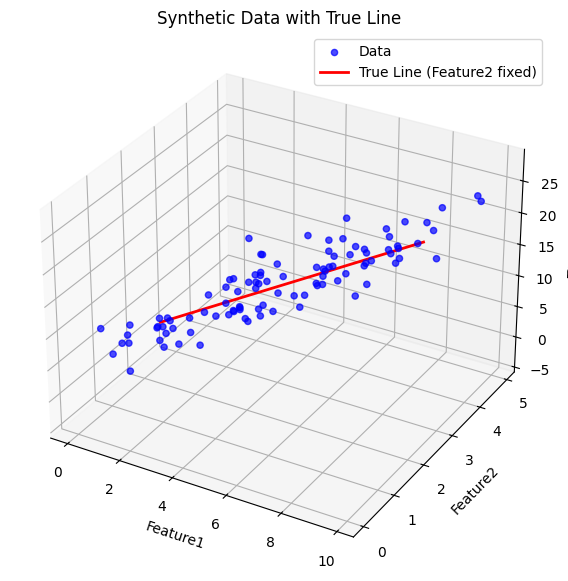

In [145]:
# 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data
ax.scatter(data['Feature1'], data['Feature2'], data['Target'], color='blue', alpha=0.7, label='Data')

# Fix Feature2 at its mean to plot a straight line along Feature1
X2_fixed = np.mean(data['Feature2'])
X1_line = np.linspace(data['Feature1'].min(), data['Feature1'].max(), 50)
Y_line = w0_true + w1_true*X1_line + w2_true*X2_fixed

# Plot straight line
ax.plot(X1_line, [X2_fixed]*len(X1_line), Y_line, color='red', linewidth=2, label='True Line (Feature2 fixed)')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Target')
ax.set_title('Synthetic Data with True Line')
ax.legend()
plt.show()


Learned Coefficients via Gradient Descent:


,Coefficient
Bias,3.729792
Feature1,2.521451
Feature2,-1.006953


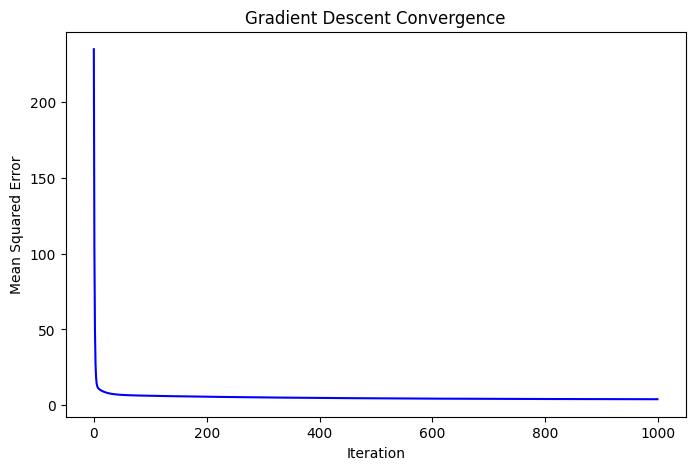

In [146]:
# Feature matrix with bias
X = np.c_[np.ones(n_samples), data[['Feature1', 'Feature2']].values]  # shape (n_samples, 3)
y_vec = data['Target'].values.reshape(-1,1)

# Initialize coefficients
theta = np.zeros((X.shape[1],1))

# Hyperparameters
alpha = 0.01
iterations = 1000

# Store cost history
mse_history = []

# Gradient Descent loop
m = len(y_vec)
for i in range(iterations):
    y_pred = X.dot(theta)
    error = y_pred - y_vec
    gradient = (1/m) * X.T.dot(error)
    theta -= alpha * gradient
    mse_history.append((1/m) * np.sum(error**2))

# Show learned coefficients
coef_names = ['Bias', 'Feature1', 'Feature2']
coef_df = pd.DataFrame(theta, index=coef_names, columns=['Coefficient'])
print("Learned Coefficients via Gradient Descent:")
display(coef_df)

# Plot convergence
plt.figure(figsize=(8,5))
plt.plot(range(iterations), mse_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.show()

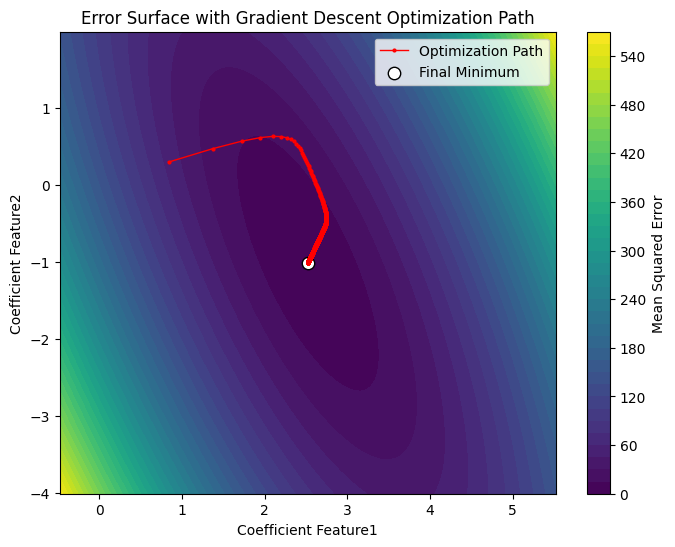

In [147]:
# --- STEP 4: ERROR SURFACE WITH OPTIMIZATION PATH ---

# We'll store the parameter updates from gradient descent
theta_path = []

# Re-run gradient descent to record each step
theta_gd = np.zeros((X.shape[1], 1))
alpha = 0.01
iterations = 1000
mse_history = []

for i in range(iterations):
    y_pred = X.dot(theta_gd)
    error = y_pred - y_vec
    gradient = (1/len(y_vec)) * X.T.dot(error)
    theta_gd -= alpha * gradient
    
    # Store current coefficients for path visualization
    theta_path.append(theta_gd.copy())
    mse_history.append((1/len(y_vec)) * np.sum(error**2))

theta_path = np.array(theta_path).reshape(iterations, 3)

# --- GRID OF COEFFICIENTS ---
w1 = np.linspace(theta[1]-3, theta[1]+3, 100)
w2 = np.linspace(theta[2]-3, theta[2]+3, 100)
W1, W2 = np.meshgrid(w1, w2)
MSE = np.zeros_like(W1)

X_no_bias = data[['Feature1', 'Feature2']].values

# Compute MSE for each pair of coefficients
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        y_pred_grid = theta[0] + W1[i,j]*X_no_bias[:,0] + W2[i,j]*X_no_bias[:,1]
        MSE[i,j] = np.mean((data['Target'].values - y_pred_grid)**2)

# --- 2D CONTOUR PLOT WITH PATH ---
plt.figure(figsize=(8,6))
contour = plt.contourf(W1, W2, MSE, levels=50, cmap='viridis')
plt.colorbar(contour, label='Mean Squared Error')
plt.xlabel('Coefficient Feature1')
plt.ylabel('Coefficient Feature2')
plt.title('Error Surface with Gradient Descent Optimization Path')

# Plot optimization path
plt.plot(theta_path[:,1], theta_path[:,2], color='red', marker='o', markersize=2, linewidth=1, label='Optimization Path')
plt.scatter(theta[1], theta[2], color='white', s=80, edgecolors='black', label='Final Minimum')

plt.legend()
plt.show()


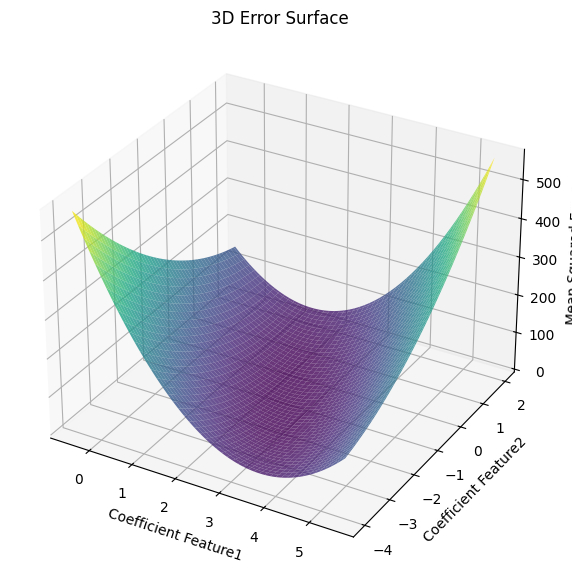

In [148]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, MSE, cmap='viridis', alpha=0.8)

ax.set_xlabel('Coefficient Feature1')
ax.set_ylabel('Coefficient Feature2')
ax.set_zlabel('Mean Squared Error')
ax.set_title('3D Error Surface')
plt.show()
